In [1]:

import cv2
import pickle

rectW,rectH=107,48

try:
    with open('carParkPos','rb') as f:
        posList=pickle.load(f)
except:
    posList=[]

def mouseClick(events,x,y,flags,params):
    if events==cv2.EVENT_LBUTTONDOWN:
        posList.append((x,y))
    if events==cv2.EVENT_RBUTTONDOWN:
        for i,pos in enumerate(posList):
            x1,y1=pos
            if x1<x<x1+rectW and y1<y<y1+rectH:
                posList.pop(i)
    with open('carParkPos','wb') as f:
        pickle.dump(posList,f)
    
            

while True:
    img=cv2.imread("img.png")
    for pos in posList: cv2.rectangle(img,pos,(pos[0]+rectW,pos[1]+rectH),(0,0,255),2)
    
    cv2.imshow("Image",img)
    cv2.setMouseCallback("Image",mouseClick)
    cv2.waitKey(1)


In [ ]:
#rotation
import cv2
# read image as greyscale
img = cv2.imread(r'img.png',1)
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow('grayscale',img_gray)
# get image height, width
(h, w) = img.shape[:2]
print(img.size)
# calculate the center of the image
center = (w / 2, h / 2)
print(center)

angle90 = 90
angle180 = 180
angle360 = 270

scale = 1.0

# 90 degrees
M = cv2.getRotationMatrix2D(center, angle90, scale)
rotated90 = cv2.warpAffine(img, M, (h, w))

# 180 degrees
M = cv2.getRotationMatrix2D(center, angle180, scale)
rotated180 = cv2.warpAffine(img, M, (w, h))

# 270 degrees
M = cv2.getRotationMatrix2D(center, angle360, scale)
rotated360 = cv2.warpAffine(img, M, (h, w))

cv2.imshow('Original Image', img)

cv2.imshow('Image rotated by 90 degrees', rotated90)

cv2.imshow('Image rotated by 180 degrees', rotated180)

cv2.imshow('Image rotated by 360 degrees', rotated360)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

2376000
(550.0, 360.0)


In [ ]:
#Canny edge
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread(r'img.png',1)
edges = cv2.Canny(img, 100, 200)
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2.imshow("Edge Detected Image", edges)


cv2.imshow("Original Image", img)
cv2.imshow("HSV image",hsv)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

In [ ]:
# Python program to illustrate HoughLine
# method for line detection
import cv2
import numpy as np

img = cv2.imread('img.png')

# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection method on the image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

for r_theta in lines:
	arr = np.array(r_theta[0], dtype=np.float64)
	r, theta = arr

	a = np.cos(theta)

	b = np.sin(theta)

	x0 = a*r

	y0 = b*r

	x1 = int(x0 + 1000*(-b))

	y1 = int(y0 + 1000*(a))

	x2 = int(x0 - 1000*(-b))

	y2 = int(y0 - 1000*(a))

	cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
cv2.imwrite('linesDetected.jpg', img)


True

In [ ]:
#scaling
import cv2
import numpy as np
image = cv2.imread('img.png')
cv2.imshow('Original Image', image)
down_width = 300
down_height = 200
down_points = (down_width, down_height)
resized_down = cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)
up_width = 600
up_height = 400
up_points = (up_width, up_height)
resized_up = cv2.resize(image, up_points, interpolation= cv2.INTER_LINEAR)
cv2.imshow('Resized Down by defining height and width', resized_down)
cv2.waitKey()
cv2.imshow('Resized Up image by defining height and width', resized_up)
cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
#zoom and reduce quality
import cv2 as cv
def zoom(img, zoom_factor=1.5):
    return cv.resize(img, None, fx=zoom_factor, fy=zoom_factor)
img = cv.imread('img.png')
height, width = img.shape[:2]
zoomed = zoom(img, 1.5)
cropped = zoomed[0:550, 0:529] 
cv.imwrite('zoomed.png', zoomed)
cv.imwrite('cropped.png', cropped)

True

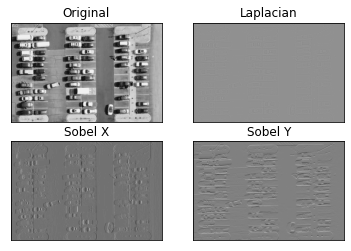

In [ ]:
#intensity gradient
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('img.png',0)
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()